In [150]:
# import libraries
import pandas as pd
from prophet import Prophet

In [151]:
# load dataset
path = 'data/ETH-N4Y.csv'
# BTC-all.csv
# BTC-N2Y.csv
# BTC-N4Y.csv
# ETH-all.csv
# ETH-N2Y.csv
# ETH-N4Y.csv
df = pd.read_csv(path)
df=df[['Adj Close','Date']]
df.rename(columns={'Adj Close': 'y','Date': 'ds'}, inplace=True)


train_spilt=int(df.shape[0]*0.9)

train_df,test_df=df[:train_spilt],df[train_spilt:]

print(train_df.shape,test_df.shape)
train_df.tail()

(576, 2) (64, 2)


,y,ds
571,1892.412476,2023-06-03
572,1890.513550,2023-06-04
573,1811.828369,2023-06-05
574,1884.494873,2023-06-06
575,1832.395996,2023-06-07


In [152]:
m = Prophet()
m.fit(train_df)

18:10:51 - cmdstanpy - INFO - Chain [1] start processing
18:10:51 - cmdstanpy - INFO - Chain [1] done processing


In [153]:
# Python
future = m.make_future_dataframe(periods=(test_df.shape[0]))
future.shape

(640, 1)

In [154]:
# Python
forecast = m.predict(future)

train_forecast=forecast["yhat"][:train_spilt]
test_forecast=forecast["yhat"][train_spilt:]

print(train_forecast.shape,test_forecast.shape)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

(576,) (64,)


,ds,yhat,yhat_lower,yhat_upper
635,2023-08-06,2206.008440,1815.301435,2546.182981
636,2023-08-07,2207.054446,1851.809621,2580.246335
637,2023-08-08,2222.252257,1828.454224,2587.439448
638,2023-08-09,2226.559025,1800.453178,2601.031336
639,2023-08-10,2217.748756,1823.594541,2624.146958


In [155]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
mae = mean_absolute_error(train_df['y'], train_forecast)
rmse = mean_squared_error(train_df['y'], train_forecast)**0.5
mape=mean_absolute_percentage_error(train_df['y'], train_forecast)
print("Train")
print("MAE：%.4f"% mae)
print("MAPE：%.4f"% mape)
print("RMSE：%.4f"% rmse)


mae = mean_absolute_error(test_df['y'], test_forecast)
rmse = mean_squared_error(test_df['y'], test_forecast)**0.5
mape=mean_absolute_percentage_error(test_df['y'], test_forecast)
print("Test")
print("MAE：%.4f"% mae)
print("MAPE：%.4f"% mape)
print("RMSE：%.4f"% rmse)



Train
MAE：177.8372
MAPE：0.0940
RMSE：227.7021
Test
MAE：251.2851
MAPE：0.1366
RMSE：262.6048


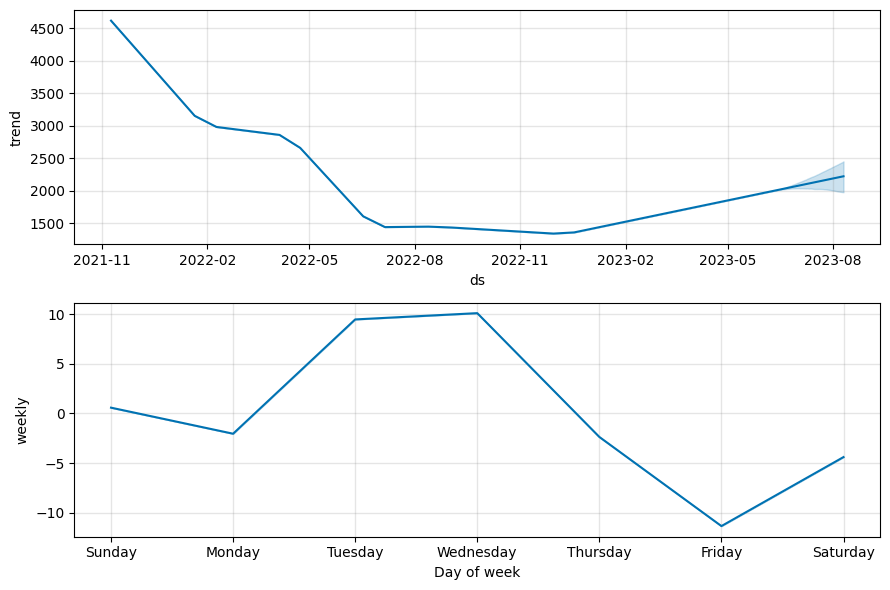

In [156]:
fig2 = m.plot_components(forecast)
